In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

## Data Overview

In [6]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\Case_study_CarPrice_Assignment.csv")
dfs = df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
companyName = df['CarName'].apply(lambda x : x.split(" ")[0])

In [12]:
df.insert(2, "companyName", companyName)

In [13]:
df.head()

,car_ID,symboling,companyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df['companyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
def replace(x, y):
    df['companyName'].replace(x,y, inplace = True)
replace('maxda', 'mazda')
replace('vokswagen', 'volkswagen')
replace('vw', 'volkswagen')
replace('porcshce', 'porsche')
replace('nissan', 'Nissan')
replace('toyouta', 'toyota')


In [16]:
df['companyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# visualization

## design

In [17]:
df1 = df[['companyName', 'price']]
df1 = df1.groupby('companyName')['price'].mean()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()

In [18]:
df1 = df1.sort_values('price')

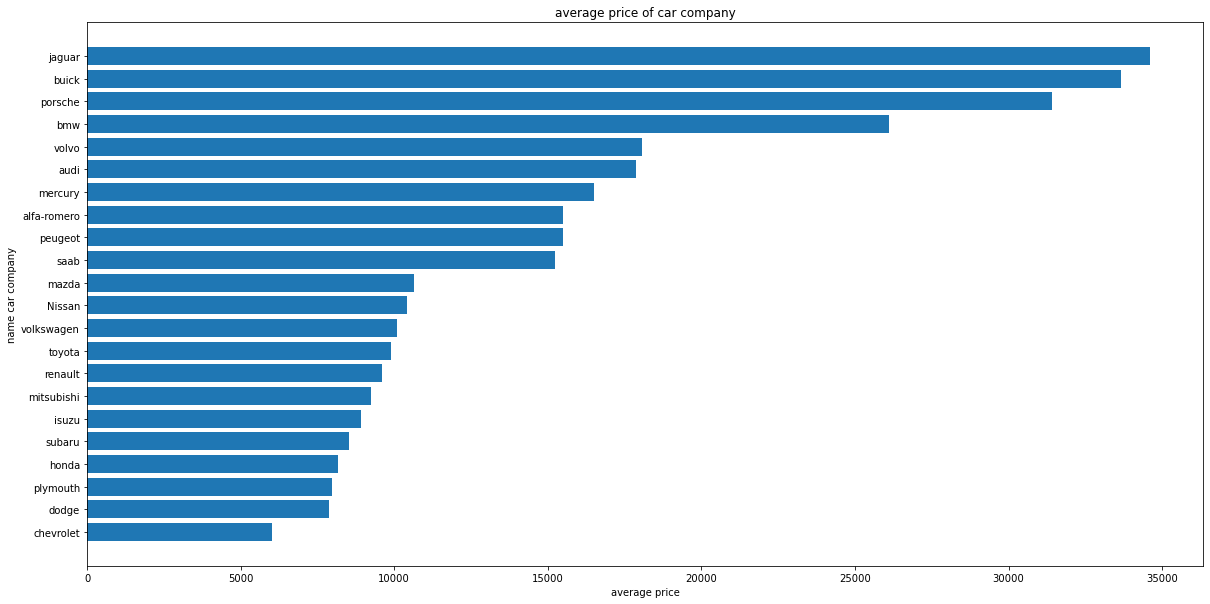

In [19]:
plt.figure(figsize=(20,10))
plt.barh(df1['companyName'], df1['price'])
plt.title("average price of car company")
plt.xlabel("average price")
plt.ylabel("name car company")
plt.show()

In [20]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

(array([ 7.,  2.,  5., 11., 11.,  8., 12., 11.,  6., 10.,  9.,  2., 10.,
         2.,  4.,  5.,  5.,  2.,  3.,  3.,  6.,  4.,  0.,  2.,  2.,  3.,
         4.,  1.,  8.,  5.,  1.,  4.,  5.,  2.,  3.,  0.,  1.,  0.,  0.,
         2.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         2.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 5118.  ,  5520.82,  5923.64,  6326.46,  6729.28,  7132.1 ,
         7534.92,  7937.74,  8340.56,  8743.38,  9146.2 ,  9549.02,
         9951.84, 10354.66, 10757.48, 11160.3 , 11563.12, 11965.94,
        12368.76, 12771.58, 13174.4 , 13577.22, 13980.04, 14382.86,
        14785.68, 15188.5 , 15591.32, 15994.14, 16396.96, 16799.78,
        17202.6 , 17605.42, 18008.24, 18411.06, 18813.88, 19216.7 ,
        19619.52, 20022.34

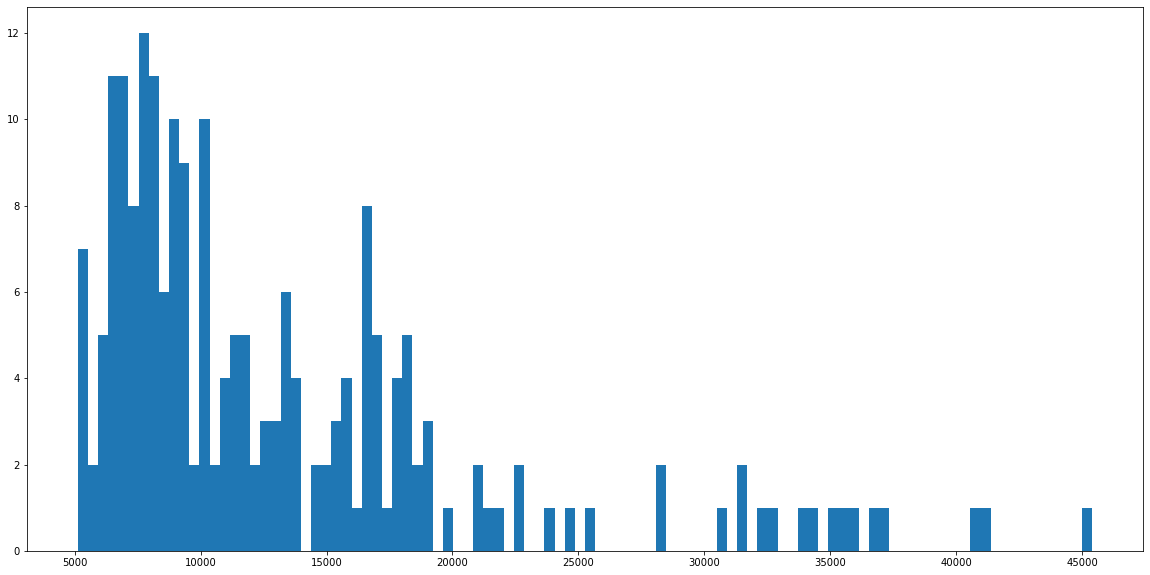

In [21]:
plt.figure(figsize=(20,10))
plt.hist(df['price'], bins = 100)

+ nhận xét:<br>
 giá trung bình của một chiếc xe có giá khoảng 13276 usd<br>
 giá thấp nhất của một chiếc xe là 5119 usd<br>
 giá cao nhất của một chiếc xe là 45400 usd<br>
 => từ nhận xét trên ta chia ra 3 phân khúc xe (tầm thấp(5000-> 9000), tầm trung(9000-> 20000 , tầm cao > 20000)

### doornumber car

In [22]:
df2 = df[["doornumber", "price"]]

In [23]:
df3 = df2.groupby(["doornumber"])['doornumber'].count()
df3 = pd.DataFrame(df3)
df3.rename(columns = {'doornumber': 'quantity'}, inplace = True)
df3 = df3.reset_index()

In [24]:
df3.head()

,doornumber,quantity
0,four,115
1,two,90


C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


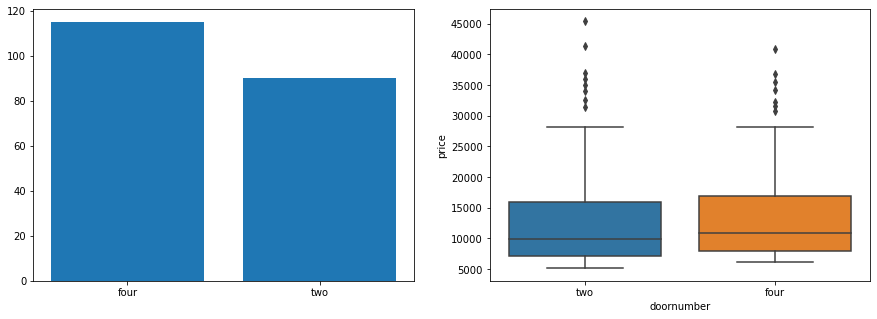

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(df3['doornumber'],df3['quantity'])
plt.subplot(1, 2, 2)
sns.boxplot(df2['doornumber'],df2['price'])
plt.show()

In [26]:

df4 = df2.loc[df2['doornumber'] == 'two', :]
two = df4.describe()

In [27]:

df5 = df2.loc[df2['doornumber'] == 'four', :]
four = df5.describe()

In [28]:
print("giá trung bình của xe 2 cửa", two)
print("giá trung bình của xe 4 cửa", four)

giá trung bình của xe 2 cửa               price
count     90.000000
mean   12989.924078
std     8784.227805
min     5118.000000
25%     7171.500000
50%     9927.000000
75%    15909.750000
max    45400.000000
giá trung bình của xe 4 cửa               price
count    115.000000
mean   13501.152174
std     7338.296321
min     6229.000000
25%     8006.000000
50%    10898.000000
75%    16872.500000
max    40960.000000


Text(0.5, 0, 'price 4 doornumber car')

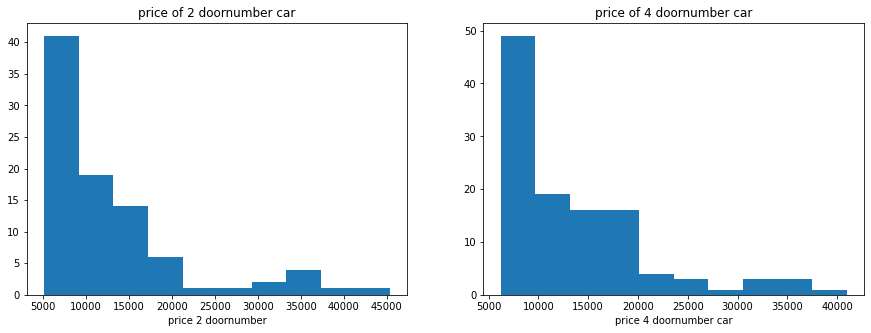

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title("price of 2 doornumber car")
plt.hist(df4['price'])
plt.xlabel("price 2 doornumber")
plt.subplot(1, 2, 2)
plt.title("price of 4 doornumber car")
plt.hist(df5['price'])
plt.xlabel("price 4 doornumber car")

+ nhìn chung trung bình giá của xe 2 cửa và giá của xe 4 cửa là tương đương với nhau

In [30]:
df.head()

,car_ID,symboling,companyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
df6 = df[['carbody', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight']]

In [32]:
df6.head()

,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight
0,convertible,front,88.6,168.8,64.1,48.8,2548
1,convertible,front,88.6,168.8,64.1,48.8,2548
2,hatchback,front,94.5,171.2,65.5,52.4,2823
3,sedan,front,99.8,176.6,66.2,54.3,2337
4,sedan,front,99.4,176.6,66.4,54.3,2824


In [33]:
df6 = df6.groupby(["carbody", "enginelocation"]).mean()

In [34]:
df6

wheelbase   carlength   carwidth  carheight  \
carbody     enginelocation                                                 
convertible front            93.340000  170.680000  65.700000  51.400000   
            rear             89.500000  168.900000  65.000000  51.600000   
hardtop     front           101.500000  179.616667  67.150000  53.266667   
            rear             89.500000  168.900000  65.000000  51.600000   
hatchback   front            95.535714  166.592857  65.247143  52.108571   
sedan       front           100.619792  177.585417  66.260417  54.337500   
wagon       front           102.156000  181.304000  66.256000  56.728000   

                             curbweight  
carbody     enginelocation               
convertible front           2802.000000  
            rear            2800.000000  
hardtop     front           2828.833333  
            rear            2756.000000  
hatchback   front           2348.185714  
sedan       front           2610.593750  
wagon       front           2784.240000

In [35]:
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)

In [36]:
def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

In [37]:
def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1


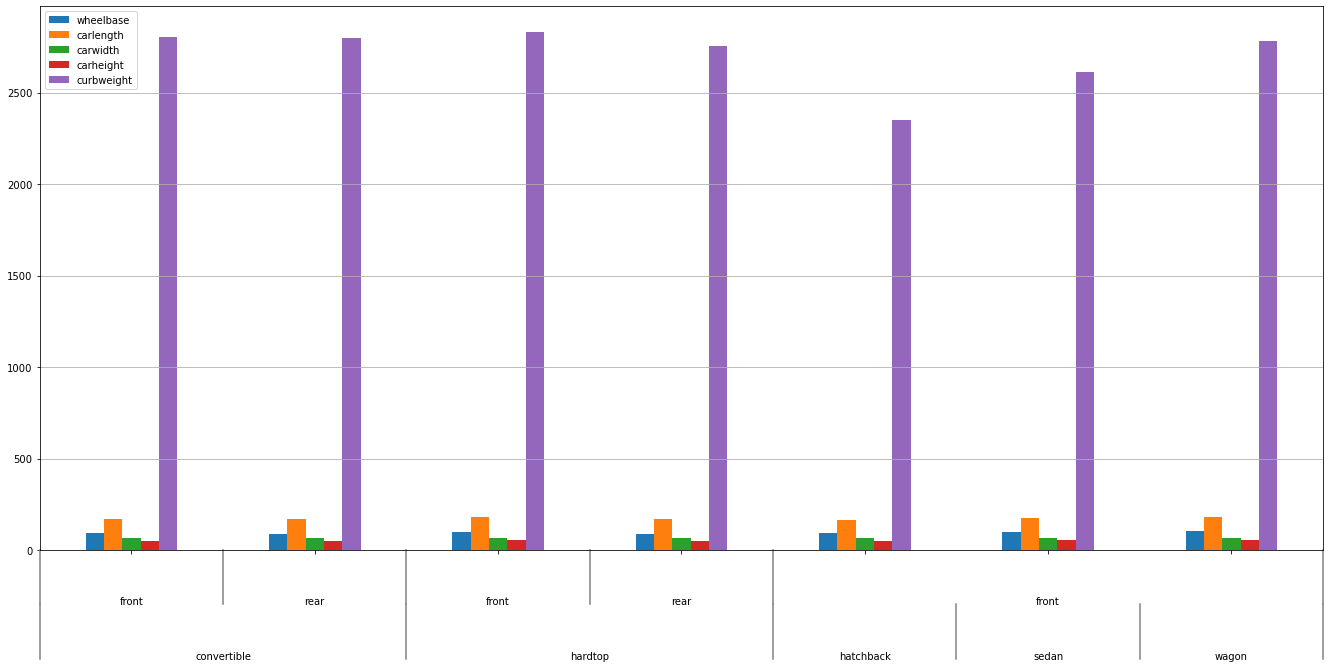

In [38]:

ax = df6.plot(kind='bar',stacked=False, figsize=(23,10))
#Below 2 lines remove default labels
ax.set_xticklabels('')
ax.set_xlabel('')

ax.grid('on', which='minor', axis='x' )
ax.grid('on', which='major', axis='y' )
label_group_bar_table(ax, df6)

In [39]:
df6

wheelbase   carlength   carwidth  carheight  \
carbody     enginelocation                                                 
convertible front            93.340000  170.680000  65.700000  51.400000   
            rear             89.500000  168.900000  65.000000  51.600000   
hardtop     front           101.500000  179.616667  67.150000  53.266667   
            rear             89.500000  168.900000  65.000000  51.600000   
hatchback   front            95.535714  166.592857  65.247143  52.108571   
sedan       front           100.619792  177.585417  66.260417  54.337500   
wagon       front           102.156000  181.304000  66.256000  56.728000   

                             curbweight  
carbody     enginelocation               
convertible front           2802.000000  
            rear            2800.000000  
hardtop     front           2828.833333  
            rear            2756.000000  
hatchback   front           2348.185714  
sedan       front           2610.593750  
wagon       front           2784.240000

### nhận xét:
+ đối với thân xe <b>hatchback</b>, <b>sedan</b>, <b>wagon</b> động cơ được đặt phía trước<br>
+ đối với thân xe <b>convertible</b>, <b>hardtop</b> động cơ có thể đặt ở phía trước hoặc phía sau
+ trọng lượng thân xe đều > 2500 chỉ riêng thân hatchback < 2500

# analytics relationship price to engine

In [40]:
dfEngine = df[['fueltype', 'aspiration', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]

In [41]:
dfEngine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   enginetype        205 non-null    object 
 3   cylindernumber    205 non-null    object 
 4   enginesize        205 non-null    int64  
 5   fuelsystem        205 non-null    object 
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 22.5+ KB


In [42]:
dfEngine.head()

,fueltype,aspiration,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
dfEngineFueltype = dfEngine[['fueltype','price']].groupby("fueltype")['price'].mean()
dfEngineFueltype = pd.DataFrame(dfEngineFueltype)
dfEngineFueltype = dfEngineFueltype.reset_index()

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


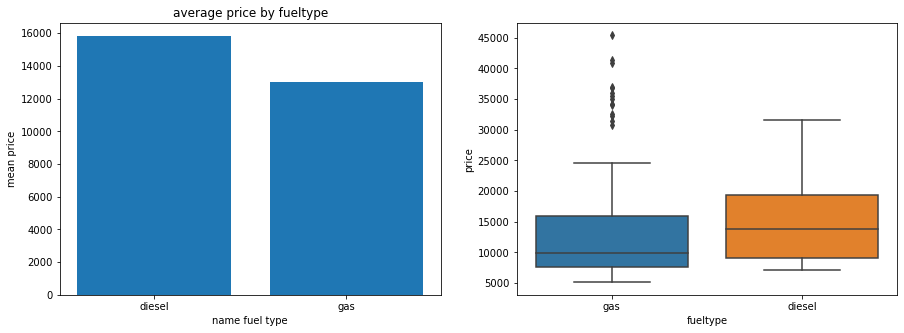

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(dfEngineFueltype['fueltype'],dfEngineFueltype['price'])
plt.title("average price by fueltype")
plt.ylabel("mean price")
plt.xlabel("name fuel type")
plt.subplot(1, 2, 2)
sns.boxplot(dfEngine['fueltype'],dfEngine['price'])
plt.show()

In [45]:
dfEnginetype = dfEngine[["enginetype", "fueltype"]].groupby("enginetype")["fueltype"].count()
dfEnginetype = pd.DataFrame(dfEnginetype)
dfEnginetype = dfEnginetype.reset_index()

In [46]:
dfEnginetype.head()

,enginetype,fueltype
0,dohc,12
1,dohcv,1
2,l,12
3,ohc,148
4,ohcf,15


C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


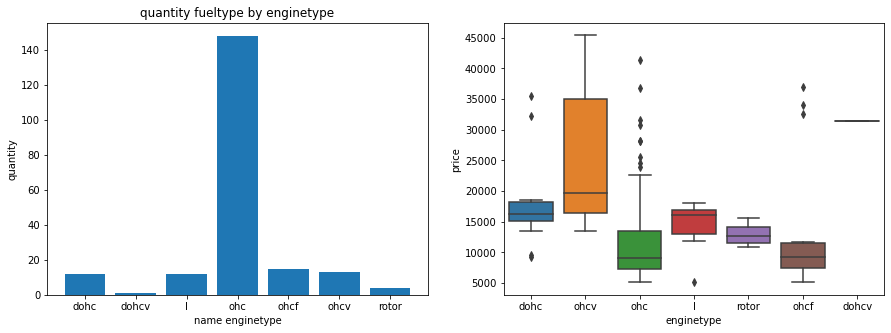

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(dfEnginetype['enginetype'],dfEnginetype['fueltype'])
plt.title("quantity fueltype by enginetype")
plt.ylabel("quantity")
plt.xlabel("name enginetype")
plt.subplot(1, 2, 2)
sns.boxplot(dfEngine['enginetype'],dfEngine['price'])
plt.show()

In [48]:
df.loc[df["enginetype"] == "ohc", ["fueltype"]].head()

,fueltype
3,gas
4,gas
5,gas
6,gas
7,gas


+ động cơ được ưa chuộng ở mĩ là <b> ohc </b> 

In [49]:
df.loc[df["price"] > 30000, ["fueltype","enginetype", "companyName", "CarName"]]

,fueltype,enginetype,companyName,CarName
15,gas,ohc,bmw,bmw x4
16,gas,ohc,bmw,bmw x5
17,gas,ohc,bmw,bmw x3
47,gas,dohc,jaguar,jaguar xj
48,gas,dohc,jaguar,jaguar xf
49,gas,ohcv,jaguar,jaguar xk
70,diesel,ohc,buick,buick skyhawk
71,gas,ohcv,buick,buick opel isuzu deluxe
72,gas,ohcv,buick,buick skylark
73,gas,ohcv,buick,buick century special


+ phần lớn phân khúc xe tầm cao sử dụng nhiên liệu gas
+ sử dụng động cơ <b>dohc</b>, <b>ohcf</b>

# 3. forecast price car by argument

## input parameters to find price cart

In [50]:
# listTest = list()
# for i in range(26):
#     x = float(input())
#     listTest.append(x)

In [51]:

# reg.predict([listTest])


# hypertype testing

### kiểm tra trung bình giá xe 2 của và xe 4 của có tương đương nhau hay không. Với mức ý nghĩa là 0.05
+ ta có :
    H0 = giá trung bình 2 xe bằng nhau<br>
    H1 = giá trung bình của 2 xe khác nhau

In [52]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.displot(inp)
    plt.axvline(np.mean(inp), color = "k", linestyle = "dashed", linewidth = 5)
    _, max_ = plt.ylim()
    plt.text(inp.mean()+ inp.mean()/10, max_ - max_ / 10, "mean: {:.2f}".format(inp.mean()),)
    return plt.figure

In [53]:
door4 = df.loc[df['doornumber'] == "four", "price"]
door2 = df.loc[df['doornumber'] == "two", "price"]

<Figure size 432x288 with 0 Axes>

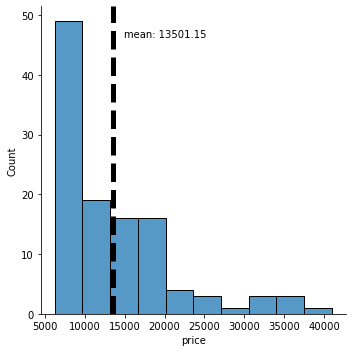

In [54]:
plot_distribution(door4)
plt.show()

<Figure size 432x288 with 0 Axes>

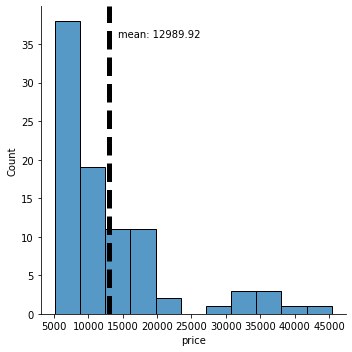

In [55]:
plot_distribution(door2)
plt.show()

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


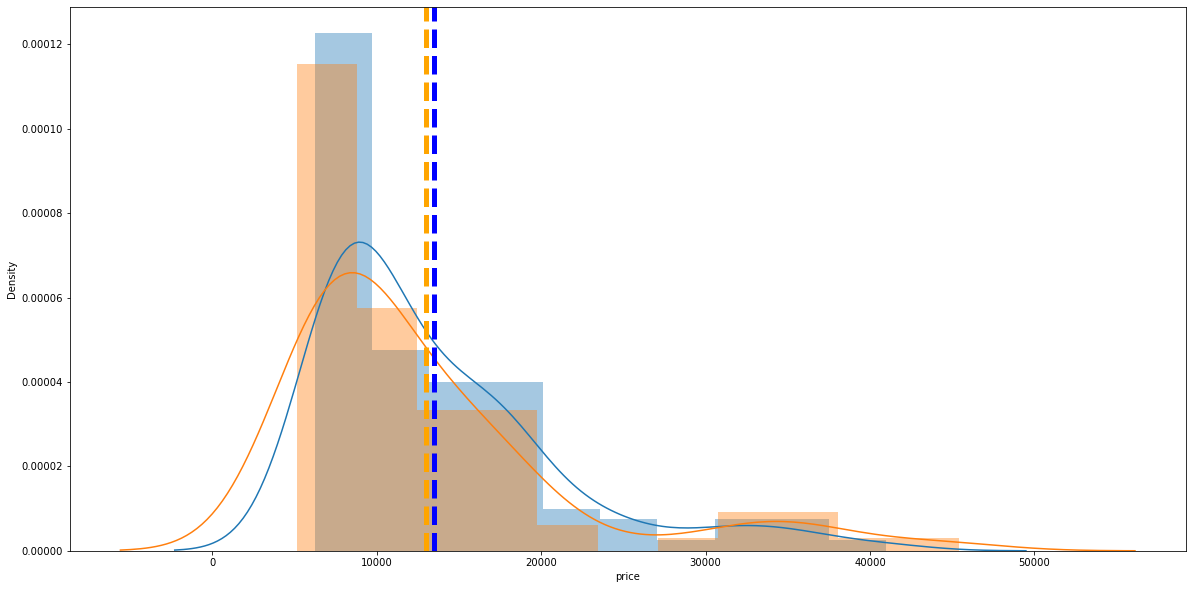

In [56]:
plt.figure(figsize = (20,10))
ax1 = sns.distplot(door4)
ax2 = sns.distplot(door2)
plt.axvline(np.mean(door4), color = "b", linestyle = 'dashed', linewidth = 5)
plt.axvline(np.mean(door2), color = "orange", linestyle = 'dashed', linewidth = 5)
plt.show()

In [57]:
from scipy.stats  import ttest_ind

In [58]:
sample_size = 15
get_door4 = np.random.choice(door4, sample_size)
get_door2 = np.random.choice(door2, sample_size)

In [59]:
stat, pvalue = ttest_ind(get_door4, get_door2)

In [60]:
print("statistics",stat)
print("pvalue: ",pvalue)

statistics 0.9745548049323669
pvalue:  0.33812601963653643


+ vì pvalue > 0.05 => đủ cơ sở để bác bỏ giả thiết H0

# buiding forecast

## replace data 

In [61]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   companyName     205 non-null    object
 1   CarName         205 non-null    object
 2   fueltype        205 non-null    object
 3   aspiration      205 non-null    object
 4   doornumber      205 non-null    object
 5   carbody         205 non-null    object
 6   drivewheel      205 non-null    object
 7   enginelocation  205 non-null    object
 8   enginetype      205 non-null    object
 9   cylindernumber  205 non-null    object
 10  fuelsystem      205 non-null    object
dtypes: object(11)
memory usage: 17.7+ KB


In [62]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [63]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [64]:
companyName = {
    'alfa-romero': 1, 
    'audi': 2, 
    'bmw': 3, 
    'chevrolet': 4, 
    'dodge': 5, 
    'honda': 6,
    'isuzu': 7, 
    'jaguar': 8, 
    'mazda': 9, 
    'buick': 10, 
    'mercury': 11, 
    'mitsubishi': 12,
    'Nissan': 13, 
    'peugeot': 14, 
    'plymouth': 15, 
    'porsche': 16, 
    'renault': 17, 
    'saab': 18,
    'subaru': 19, 'toyota': 20, 'volkswagen': 21, 'volvo': 22
}
fueltype = {
    'gas': 1, 'diesel':2
}
aspiration = {
    'std': 1, 'turbo': 2
}
doornumber = {
    'two': 2, 'four': 4
}
carbody = {
    'convertible':1, 'hatchback': 2, 'sedan': 3, 'wagon': 4, 'hardtop': 5
}
drivewheel = {
    'rwd': 1, 'fwd': 2, '4wd': 3
}
enginelocation ={
    'front': 1, 'rear': 2
}
enginetype = {
    'dohc': 1, 'ohcv': 2, 'ohc': 3, 'l': 4, 'rotor': 5, 'ohcf': 6, 'dohcv': 7
}
cylindernumber = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
fuelsystem = {'mpfi': 1, '2bbl': 2, 'mfi': 3, '1bbl': 4, 'spfi': 5, '4bbl': 6, 'idi': 7, 'spdi': 8}

In [65]:
for i in [companyName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem]:
    df.replace(i, inplace = True)

## plot headmap

In [66]:
data = df.drop('CarName', axis = 1)

In [67]:
corr = data.corr()

C:\Users\FPTSHOP\AppData\Local\Temp/ipykernel_10248/4008540861.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


Text(0.5, 1.0, 'Correlation')

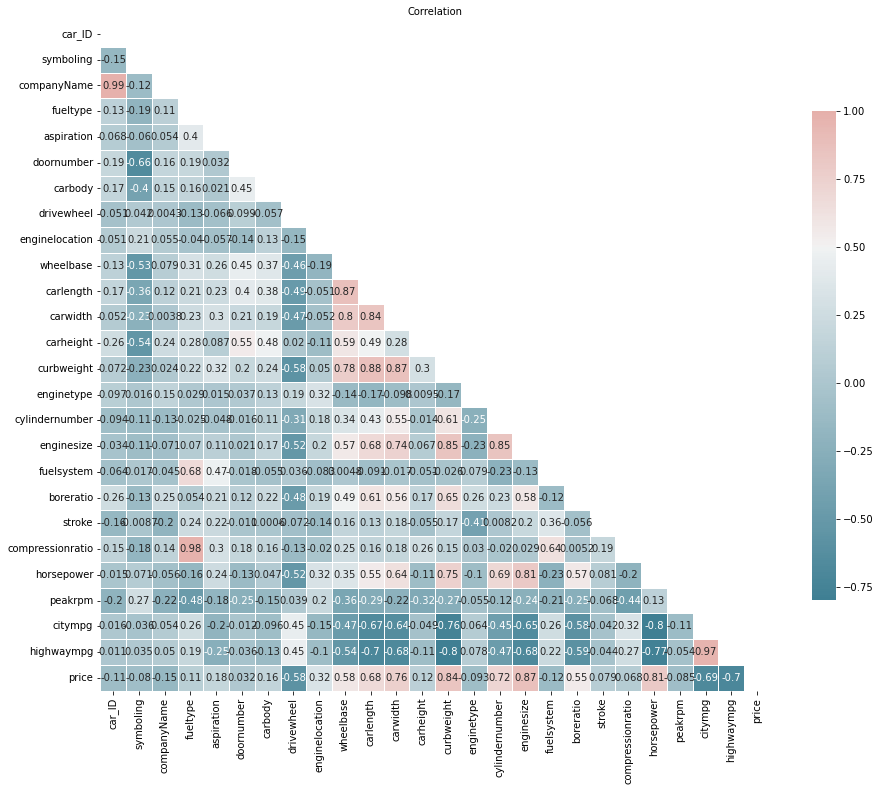

In [68]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 15, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmax=1, 
            center=0.5, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)

In [69]:
dataCorrelation = data[['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
                       'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'highwaympg', 'price']]

In [70]:
x = dataCorrelation.drop('price', axis = 1)
y = dataCorrelation['price']

In [71]:
dataCorrelation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drivewheel      205 non-null    int64  
 1   wheelbase       205 non-null    float64
 2   carlength       205 non-null    float64
 3   carwidth        205 non-null    float64
 4   curbweight      205 non-null    int64  
 5   cylindernumber  205 non-null    int64  
 6   enginesize      205 non-null    int64  
 7   boreratio       205 non-null    float64
 8   horsepower      205 non-null    int64  
 9   highwaympg      205 non-null    int64  
 10  price           205 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 17.7 KB


## plot pairplot

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


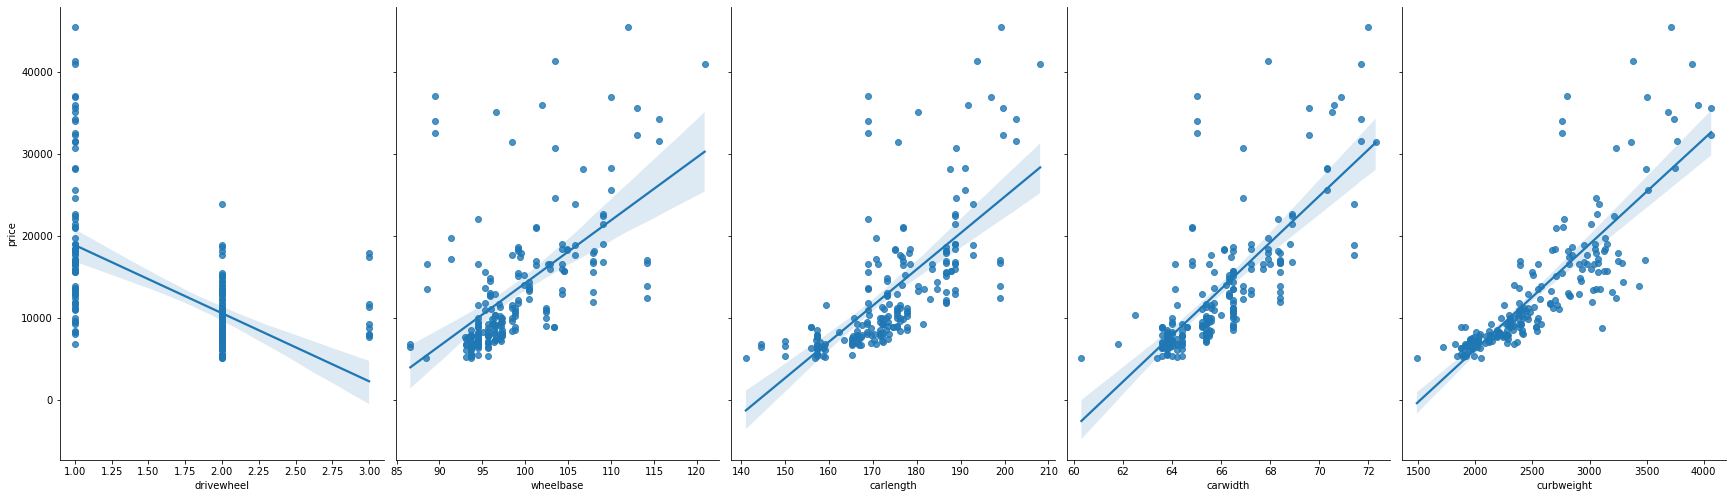

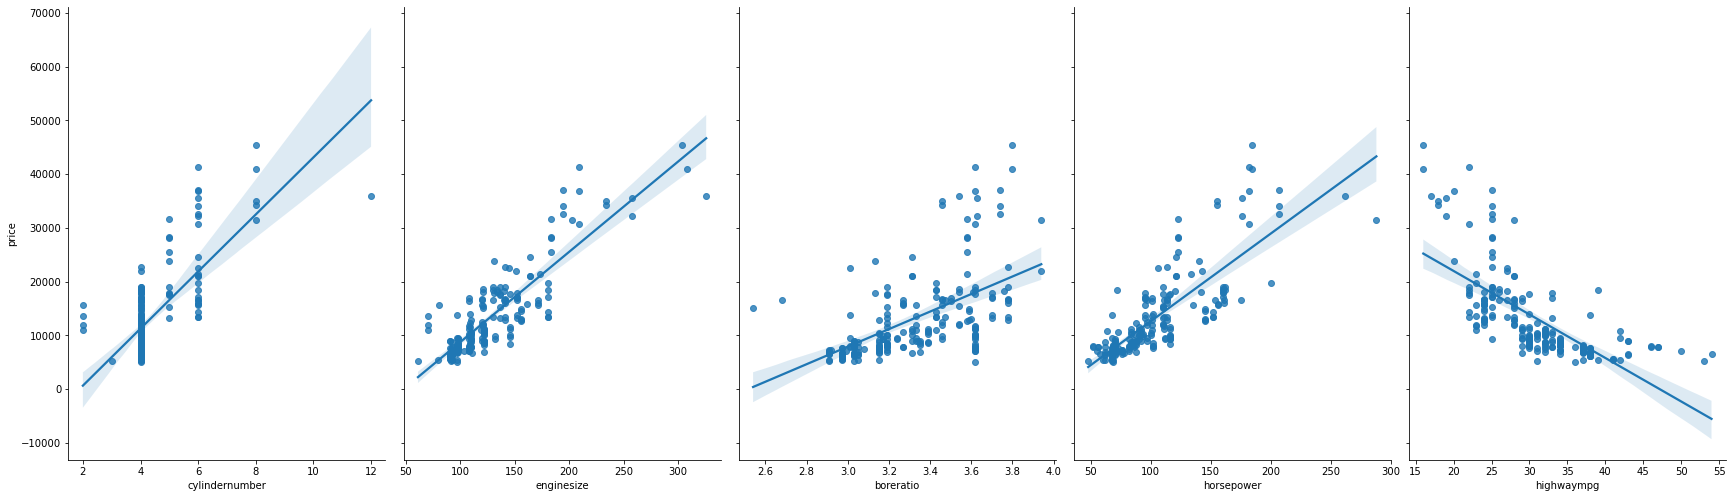

In [72]:

sns.pairplot(dataCorrelation, x_vars=['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight'], y_vars='price', size=7, aspect=0.7, kind='reg')

sns.pairplot(dataCorrelation, x_vars=[ 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'highwaympg'], y_vars='price', size=7, aspect=0.7, kind='reg')


## Building training model

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 42)

In [74]:
model = LinearRegression()

In [75]:
model.fit(x_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(x_test)

In [77]:
model.score(x_test, y_test)

0.7738027819882671

In [78]:
# Calculate R2-score
score=r2_score(y_test,y_pred)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

R2-score is  0.7738027819882671
Mean_sqrd_error is== 15671933.693542553
Root_mean_squared error of is== 3958.779318621152


In [79]:
y_pred = pd.DataFrame(y_pred)

In [80]:
y_pred

,0
0,25336.134330
1,16904.941435
2,10658.410039
3,12813.757185
4,24386.040176
...,...
57,10082.833102
58,23129.960355
59,6366.699511
60,8620.793074


In [81]:
x_test['price'] = y_pred[0]

C:\Users\FPTSHOP\AppData\Local\Temp/ipykernel_10248/542273675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['price'] = y_pred[0]


In [82]:
x_test

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,highwaympg,price
15,1,103.5,189.0,66.9,3230,6,209,3.62,182,22,5654.493472
9,3,99.5,178.2,67.9,3053,5,131,3.13,160,22,6587.891452
100,2,97.2,173.4,65.2,2302,4,120,3.33,97,34,NaN
132,2,99.1,186.6,66.5,2658,4,121,3.54,110,28,NaN
68,1,110.0,190.9,70.3,3750,5,183,3.58,123,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56,1,95.3,169.0,65.7,2380,2,70,3.33,101,23,15535.335923
128,1,89.5,168.9,65.0,2800,6,194,3.74,207,25,NaN
76,2,93.7,157.3,64.4,1918,4,92,2.97,68,41,NaN
144,3,97.0,172.0,65.4,2385,4,108,3.62,82,25,NaN


# Conclude

+ ta chia các giá xe thành 3 phân khúc: <i> trung bình giá xe có khoảng 13276 usd</i>
    + phân khúc tầm thấp (5000 đến 9000)
    + phân khúc giá tầm trung (9000 đến 20000)porche, jaguar, buick
    + phân khúc tầm cao ( cao 20000) các hãng xe 
+ trung bình giá xe 2 cửa cao hơn xe 4 cửa
+ đối với thân xe hatchback, sedan, wagon động cơ được đặt phía trước
+ đối với thân xe convertible, hardtop động cơ có thể đặt ở phía trước hoặc phía sau
+ trọng lượng thân xe đều > 2500 chỉ riêng thân hatchback < 2500
+ phần lớn các hãng xe ở mỹ đều sử dụng nhiên liệu diesel vì có giá tiền rẻ hơn gas
+ động cơ được được sử dụng nhiều ở mĩ <b>ohc</b> vì nó có giá thấp 
